<font size=6>**Lecture 1: Basics of Optimization**</font>
<div style="border: 1px solid lightgray; padding: 10px; background-color: #f9f9f9;">

<font size=1>

    Paolo Bonfini, 2024. All rights reserved.

This work is the intellectual property of `Paolo Bonfini`. All content produced in this notebook is original creation of the author unless specified otherwise. Unauthorized use, reproduction, or distribution of this material, in whole or in part, without explicit permission from the author, is strictly prohibited.
</font>
</div>

_NOTE: The contents presented here constitute general statistics knowledge, and are not reported in a structured way in a specific chapter of the main course book. Under each section we report where to find the material to study the theory._

- - -

This notebook introduces to the concept of "**optimization**", in the sense of finding the best parameters of a function.

Notice that "optimization" is an <u>umbrella term</u>, which, depending on the _specific context_, can manifest as:

- **minimization**
- **maximization**
- **fitting**

In this notebook, we will focus on **function fitting**, but the concepts outlined here are <u>valid for optimization in general</u>.

> For the sake of this course, we can use the terms "_fit_" and "_optimize_" interchangeably

# What is [parametric] fitting

Easiest to start with a **linear** example.

Say we have some _observed_ data:

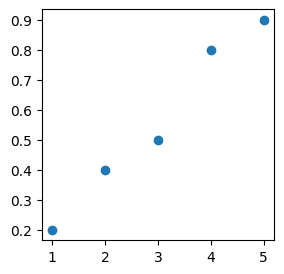

In [2]:
X = [1, 2, 3, 4, 5]
y = [0.2, 0.4, 0.5, 0.8, 0.9]

from matplotlib import pyplot as plt
plt.figure(figsize=(3,3))
plt.scatter(X, y)
plt.show()

... and we want a model that represents the true beahvior of the data.

> We may want to use it for:
> - **predicting** new data
> - **explain** the phenomenon that causes our observations

Let's assume a one-dimensional **linear model**, that is, a model of the type:

$$ y = \alpha{}x + \beta $$

where we call $\alpha$ and $\beta$ the model **parameters**.

By changing the parameters we obtain **different models**, e.g.:

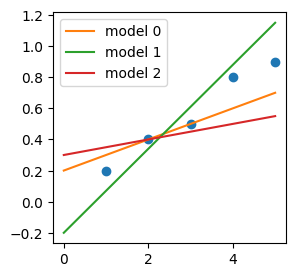

In [3]:
import numpy as np

def funct(xx, alpha, beta):
    return alpha*xx + beta

xx = np.linspace(0 ,5, 100)
'''Notice that `xx` is not the same as `X` (the data), but just 
an array of equally spaced values that we use for plotting purposes.'''

alphas = [0.1, 0.27, 0.05]
betas  = [0.2, -0.2, 0.3]

plt.figure(figsize=(3,3))

for i, (alpha, beta) in enumerate(zip(alphas, betas)):
    
    y_model_i = funct(xx, alpha, beta)
    plt.plot(xx, y_model_i, label='model %s' % i, c=str('C%s' % (i+1)))

plt.scatter(X, y)
plt.legend()
plt.show()

> It is convenient to think that each **parameter set** gives rise to a **different model**<br>
($\rightarrow$ _convenient for when we will talk about "model selection"_)

So the problem of picking the **best-fitting model** becomes $\rightarrow$ _How do I pick the best $\alpha$ and $\beta$?_

**Q:** First of all: what "**best**" means? (_in-class discussion_)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
<b><summary>[Spoiler] (click here to expand)</summary></b>
    
$\rightarrow$ We need to define a <b>metric of fitness</b>!
   
</details>
</div>

- - -

As a fitness metric, we could use the **error** that each model makes.  For each observed datum, the error is:

$$ err_{i} = y_i - \hat{y}_i$$

where $ \hat{y}_i$ is the model prediction for the corresponding $x_{i}$:

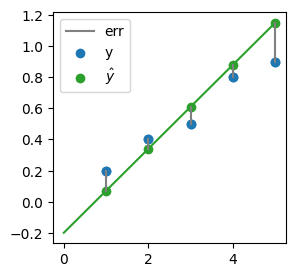

In [4]:
plt.figure(figsize=(3,3))
 
yhat_1 = funct(np.array(X), alphas[1], betas[1]) # model predictions (dots)
y_model_1 = funct(xx, alphas[1], betas[1]) # just for plotting the model (line)

plt.plot(xx, y_model_1, c='C2')
errs = plt.plot((X, X), (y, yhat_1), c='grey', label='err')
plt.setp(errs[1:], label="_")
plt.scatter(X, y, label='y', c='C0')
plt.scatter(X, yhat_1, label='$\hat{y}$', c='C2')

plt.scatter(X, y)
plt.legend()
plt.show()

$\rightarrow$ So what about picking the $\alpha$ and $\beta$ that minimize the errors?

It's easier if we use **single number** to minimize, so, we can consider the "sum of errors":

$$ \sum_i err_i = \sum_i (y_i - \hat{y}_i) $$

**Q:** But minimizing this has a problem. Can you guess? (_in-class discussion_)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
<b><summary>[Spoiler] (click here to expand)</summary></b>
    
$\rightarrow$ Sorry, you should have paid attention in class!
   
</details>
</div>

- - -

We consider the **sum of squares**:

$$ S = \sum_i err_i^2 = \sum_i (y_i - \hat{y}_i)^2 $$

and hence the **Least Squares Method**:

> The best-fitting parameters (=model) are those that <u>minimize the sum of squares of the errors</u>

<u>IMPORTANT:</u><br>
> The Least Squares method is only <u>one</u> possible optimization method.
>
> As we will see over and over again during this course, there are other **definitions** of "best fitting model" (e.g. _the one that minimizes the absolute error_), as well as countless **algorithms** to find such optimum.

Yet, LS is a very good example to start with, to get the general **intuition** behind otpimization.

# Fitting a line via Ordinary Least Squares (OLS)

The linear case offers the _simplest_ application of LS fitting, which goes under tha name of **Ordinary Least Squares (OLS)**.

Simple $\rightarrow$ We can solve this <u>analytically</u> (_no approximations, no iterations, computationally fast_).

## Problem definition

_See [this wikipedia article on OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares) for the formalism/nomenclature._

We first need to generalize to $p$ dimensions  $\rightarrow$ now, each $X_i$ for sample $i$ is not a single feature (as before), but an **array of features**: 

$$X_i = [x_0, x_1, x_2, ..., x_p]~~for~sample~i$$

So, if we have **$n$ samples**, each having **$p$ dimensions**, the data matrix is:

<table><tr>
    <td width=220>
        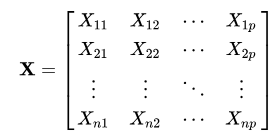
    </td>
</tr></table>

_NOTE: Samples are along columns, in this notation._

- - -
However, the **target variable** is still one-dimensional:

<table><tr>
    <td width=80>
        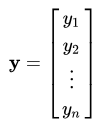
    </td>
</tr></table>   

- - - 

Now, for the **model** $-$ In the 1D cases we said it was:

$$ y = \alpha{}x + \beta$$

Generalizing to $p$ dimensions, one could say that the **multi-dimensional model** should be of the form: 

$$ y = \beta_1{}x_{1} + \beta_2{}x_{2} + ... + \beta_p{}x_{p} + const$$

... where "_const_" plays the role of $\beta$ in the 1D case, and instead of using $\alpha$, $\beta$, $\gamma$, etc., we just use $\beta_1$, $\beta_2$, $\beta_3$, not to run out of Greek letters!

- - -

We can forget about the const with a small trick, without losing generalization (again, see [the wikipedia OLS article](https://en.wikipedia.org/wiki/Ordinary_least_squares)) $-$ so our **generalized multi-dimensional linear model** becomes:

$$ y = \beta_1{}x_{1} + \beta_2{}x_{2} + ... + \beta_p{}x_{p} $$

But, to be formally precise, we should add the index $i$, because this <u>must old true for _every_ data point $i$</u>:

$$ y_i = \beta_1{}x_{i, 1} + \beta_2{}x_{i, 2} + ... + \beta_p{}x_{i, p} $$

or, in _vector_ notation:

$$ y_i = \pmb{x_{i}}^T \pmb{\beta}$$

for each point $i$.  In _matrix notation_ we can represent the equations for all points in one go:

$$ \pmb{y} = \pmb{X} \pmb{\beta}$$

<table><tr>
    <td width=400>
        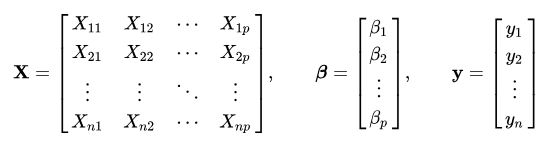
    </td>
</tr></table>  

## Solution

_See [this wikipedia article on Least squares](https://en.wikipedia.org/wiki/Least_squares) for the derivation._

The solution is obtained by:

1. **Writing the squares in a convenient form**

$$ S(\pmb{\beta}) = || \pmb{y} - \pmb{X} \pmb{\beta} ||^2$$

$$ = (\pmb{y} - \pmb{X\beta})^T(\pmb{y} - \pmb{X\beta})$$

$$ = \pmb{y}^T\pmb{y} - \pmb{y}^T\pmb{X}\pmb{\beta} - \pmb{\beta}^T\pmb{X}^T\pmb{y} + \pmb{\beta}^T\pmb{X}^T\pmb{X}\pmb{\beta} $$

2. **Finding the minimizer by searching where the derivative of $S(\pmb{\beta})$ equals 0**

$$ 0 = \frac{\partial S(\pmb{\beta})}{\partial \pmb{\beta}} $$

> <u>IMPORTANT</u>: We want to minimize $S(\pmb{\beta})$ with respect to $\pmb{\beta}$, <u>not</u> $\pmb{X}$ !<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; $\rightarrow$ _i.e., we are looking for the best parameter set $\hat{\pmb{\beta}}$ that minimizes the squared errors:_
>
> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; $\pmb{\beta} = \operatorname{argmin_\beta} S(\pmb{\beta})$

$$ 0 = \frac{\partial S(\pmb{\beta})}{\partial \pmb{\beta}} $$

$$
= \frac{\partial 
    ( \pmb{y}^T\pmb{y} - \pmb{y}^T\pmb{X}\pmb{\beta} - \pmb{\beta}^T\pmb{X}^T\pmb{y}
    +\pmb{\beta}^T\pmb{X}^T\pmb{X}\pmb{\beta} )
   }{
    \partial \pmb{\beta}
   } 
$$

$$ = -2\pmb{X}^T\pmb{y} + 2\pmb{X}^T\pmb{X}\pmb{\beta} $$

simplifying, and moving terms around it follows:

$$ \pmb{X}^T\pmb{y} =  \pmb{X}^T\pmb{X}\pmb{\beta} $$

\begin{equation}
    \pmb{\hat{\beta}} = (\pmb{X}^T\pmb{X})^{-1}\pmb{X}^T\pmb{y} \tag{Eq. 1}
\end{equation}

><u>Extremely simple</u>
>
><u>But is it computationlly fast?</u><br>  Inverting a matrix (in our case, ($\pmb{X}^T\pmb{X})^{-1}$) is a "heavy lifting" job for a computer.<br>
> $\rightarrow$ _complexity: $\mathcal{O}(n^3)$_


## In python

We will use [`numpy.linalg.lstsq`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) to fit:

$$ y = \beta_2{}x + \beta_1 $$

to the data seen above (notice that now we call every parameter as "$\beta_{<number>}$", as for the generic multi-dimensional case).

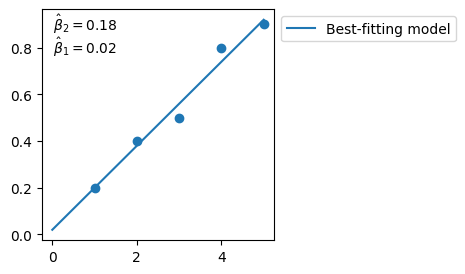

In [4]:
# Same data as above:
X = np.array([1, 2, 3, 4, 5])
y = np.array([0.2, 0.4, 0.5, 0.8, 0.9])

from numpy.linalg import lstsq

X_prime = np.vstack([X, np.ones(len(X))]).T
'''
What is this line doing?! Adding a row of `1`s to our data?! Why?

Remember, above, when we said that we can "hide" the constant in:
    y = beta*X + const
using a trick?

The trick it is to create a "fake", additional feature in X, and fill it
with ones.  This will play the role of the constant.

See the links above, as well as the `np.linalg.lstsq` documentation, here:
    https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
''';

beta_2_hat, beta_1_hat = np.linalg.lstsq(X_prime, y, rcond=None)[0]
# best-fitting parameters

fig, ax = plt.subplots(figsize=(3,3), ncols=1, nrows=1)
plt.scatter(X, y)
plt.plot(xx, beta_2_hat*xx + beta_1_hat, 'C0', label='Best-fitting model')
plt.text(.05, .99, '$\\hat{\\beta}_2 = %.2f$' % beta_2_hat, ha='left', va='top', transform=ax.transAxes)
plt.text(.05, .89, '$\\hat{\\beta}_1 = %.2f$' % beta_1_hat, ha='left', va='top', transform=ax.transAxes)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## In python - an easier library

Ok, `numpy.linalg.lstsq` is very educational because it solves the OLS problem **algebraically**, just like but in Equation 1.<br>
But $-$ as you have seen $-$ it has a clumsy usage.

For practical purposes, we will now on use the much more **intuitive** and **flexible** [`lmfit`](https://lmfit.github.io/lmfit-py/).

> _NOTE: Internally, it uses by default a different algorithm to solve the least-squares problem (see later: "Levemberg-Marquardt"), but we pretend not, for now._

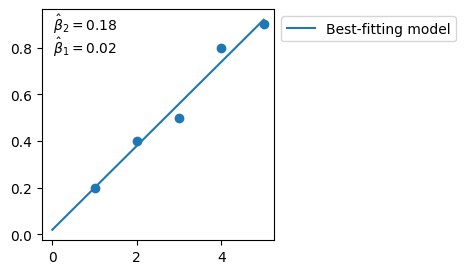

In [5]:
from lmfit import Model

def model_func(x, beta_1, beta_2):
    y = beta_2*x + beta_1
    return y

# Create an lmfit `Model` object:
model = Model(model_func)

# Invoking the `fit()` method, which returns the object `result`:
result = model.fit(y, x=X, beta_1=0, beta_2=1)
'''
Notice that here we are providing some initial guess for `beta_1` and `beta_2`,
this is only because this library is using the Levemberg-Marquardt algorithm.

In reality OLS doesn't need initial guesses when using the algebraic solution,
as demonstrated above by using `np.linalg.lstsq`, which properly solves OLS.

We will see later why Levemberg-Marquardt requires initial guesses.
'''

# Retrieving best-fit parameters:
beta_1_hat = result.params['beta_1'].value
beta_2_hat = result.params['beta_2'].value

xx = np.linspace(0 , np.max(X), 100)
'''Notice that `xx` is not the same as `X` (the data), but just 
an array of equally spaced values that we use for plotting purposes.'''

fig, ax = plt.subplots(figsize=(3,3), ncols=1, nrows=1)
plt.scatter(X, y)
plt.plot(xx, beta_2_hat*xx + beta_1_hat, 'C0', label='Best-fitting model')
plt.text(.05, .99, '$\\hat{\\beta}_2 = %.2f$' % beta_2_hat, ha='left', va='top', transform=ax.transAxes)
plt.text(.05, .89, '$\\hat{\\beta}_1 = %.2f$' % beta_1_hat, ha='left', va='top', transform=ax.transAxes)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<div class="alert alert-block alert-warning" style="margin-top: 20px">

#  In-class Exercise [30 min]

**Objective:** Evaluate the best-fit model to some data. You will have to assume a model, and then run the Least-Squares minimization on the provided data. 

<u>The final goal is to observe what happens when you apply the model to new, "_test_" data.</u>
<br>

**Dataset:** The following one.
</div>    

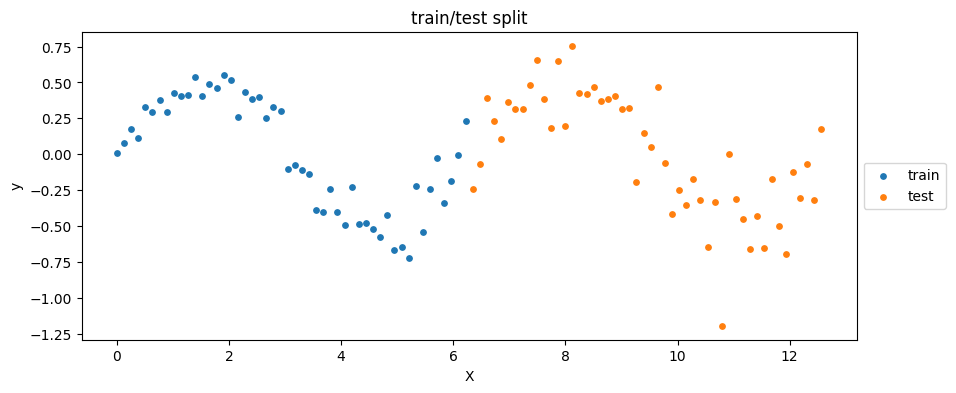

In [6]:
# Loading and plotting data:
import tarfile
import io
from matplotlib import pyplot as plt
import numpy as np

tar = tarfile.open("L01_data_inclass_ex1.tar.gz", "r:gz")

def convert_and_load(file):
    with io.BytesIO(file.read()) as f:
        return np.load(f)

for member in tar.getmembers():
    file = tar.extractfile(member)
    if member.name == 'X_train.npy': X_train = convert_and_load(file)
    if member.name == 'y_train.npy': y_train = convert_and_load(file)
    if member.name == 'X_test.npy':  X_test  = convert_and_load(file)
    if member.name == 'y_test.npy':  y_test  = convert_and_load(file)

plt.figure(figsize=(10, 4))
plt.scatter(X_train, y_train, label='train', c='C0', s=15)
plt.scatter(X_test,  y_test,  label='test',  c='C1', s=15)
plt.xlabel('X')
plt.ylabel('y')
plt.title('train/test split')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
plt.show()

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Task:**  In particular, you will have to:
1. Look at the data and assume a model
2. Use only the "_train_" data to perform the LS minimization to find the best model
3. Using the best model, calculate and plot the model predictions on the "_train_" data
4. Calculate and plot the model predictions on the "_test_" data
5. Calculate the squares of errors for the "_train_" ($S_{train}$) and "_test_" ($S_{test}$) data
6. Now compare the two squares of errors $\rightarrow$ _What do you notice?_

**Hints:**
- _For task 4_ $-$ To get the squares of errors you can simply calculate:
$$ S_{train} = \sum_i (y_i - \hat{y}_i)^2 ~~~~~ \forall i \in train$$

$$ S_{test} = \sum_i (y_i - \hat{y}_i)^2 ~~~~~ \forall i \in test$$

&emsp;&ensp; Notice that $-$ once the model has been fit $-$ $S_{train}$ is effectively the minimized Least Squares.<br>
&emsp;&ensp; But what about $ S_{test} $? 
    
</div>

<hr style='height:1px'>

_Our solution_

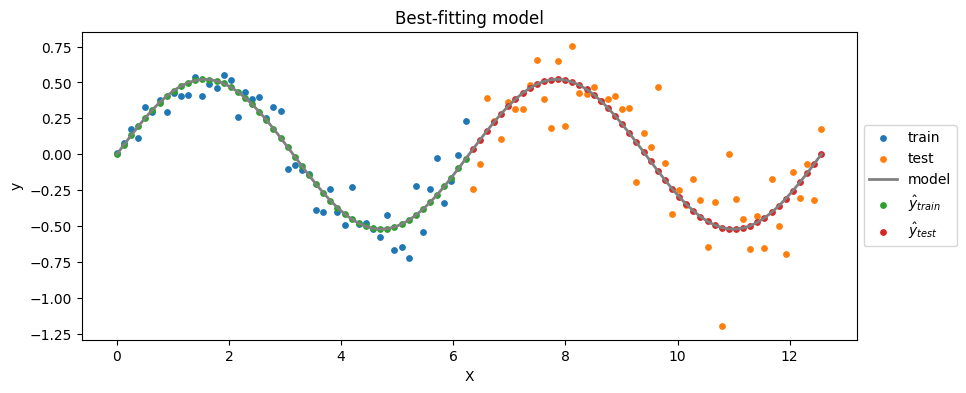

In [12]:
from lmfit import Model

# 1. Assuming a sinusoidal model
def model_func(x, beta_1):
    y = beta_1*np.sin(x)
    return y

# 2. Using only the "_train_" data to perform the LS minimization

# Create an lmfit `Model` object:
model = Model(model_func)

# Invoking the `fit()` method, which returns the object `result`:
result = model.fit(y_train, x=X_train, beta_1=0)

# Retrieving best-fit parameters:
beta_1_hat = result.params['beta_1'].value

# 3. Calculating and plotting the model predictions on the "_train_" data
# 4. Calculating and plotting the model predictions on the "_test_" data
# Predictions of the model for train/test:
yhat_train = model_func(X_train, beta_1_hat)
yhat_test  = model_func(X_test,  beta_1_hat)

xx = np.linspace(0 ,np.max(X_test), 100)
'''Notice that `xx` is not the same as `X` (the data), but just 
an array of equally spaced values that we use for plotting purposes.'''

plt.figure(figsize=(10, 4))
# Data:
plt.scatter(X_train, y_train, label='train', c='C0', s=15)
plt.scatter(X_test,  y_test,  label='test',  c='C1', s=15)
# Model:
plt.plot(xx, model_func(xx, beta_1_hat), label='model', c='grey', lw=2)
# Train predictions:
plt.scatter(X_train, yhat_train, label='$\hat{y}_{train}$', c='C2', s=15)
# Test predictions:
plt.scatter(X_test,  yhat_test,  label='$\hat{y}_{test}$',  c='C3', s=15)
#
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best-fitting model')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
plt.show()

In [14]:
# 5. Calculating squares of errors for the "_train_" and "_test_":
S_train = np.sum( (yhat_train - y_train)**2 )
S_test  = np.sum( (yhat_test - y_test)**2 )

# 6. Now comparing the two squares:
print("S_train: %.2f | S_test: %.2f" % (S_train, S_test))

S_train: 0.68 | S_test: 2.43


$S_{test}$ <u>is way larger than</u> $S_{train}$ $\rightarrow$ **overfitting**

This is to be expected because the model has been trained on $X_{train}$, and, as you can see, $X_{test}$ shows larger variance.

**Q:** What could we do to obtain a more **balanced model** (i.e., a model with similar _performance_ on train and test data)? (_in-class discussion_)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
<b><summary>[Spoiler] (click here to expand)</summary></b>
    
$\rightarrow$ <b>Shuffle</b> the data!
    
</details>
</div>

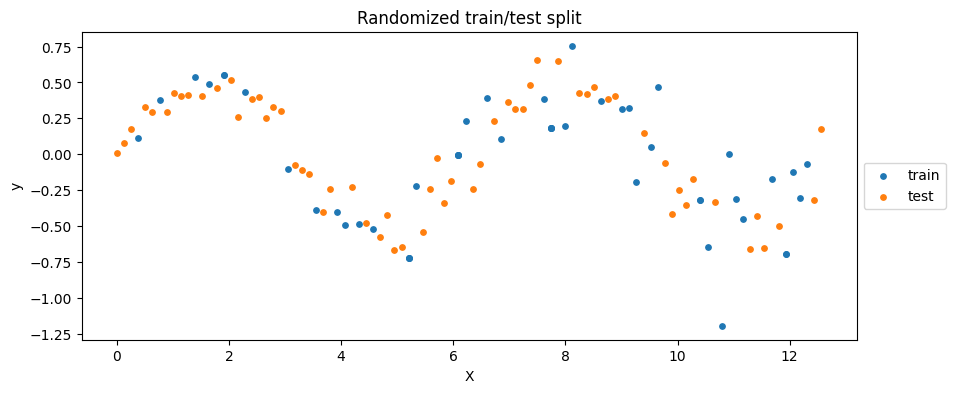

In [17]:
'''Merging train and test data, first.'''
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

'''
Now performing a random split of the merged data.
Re-running this block will generate a new, randomized split.
'''
idxs_train_ = np.random.choice(np.arange((len(X))), size=len(X_train))
# ^here we pick at random some train indexes from the merged `X` 
idxs_test_ = list(set(np.arange((len(X)))) - set(idxs_train_))
# ^here we pick the complementary indexes

X_train_ = X[idxs_train_]
y_train_ = y[idxs_train_]
X_test_ = X[idxs_test_]
y_test_ = y[idxs_test_]

plt.figure(figsize=(10, 4))
plt.scatter(X_train_, y_train_, label='train', c='C0', s=15)
plt.scatter(X_test_,  y_test_,  label='test',  c='C1', s=15)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Randomized train/test split')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
plt.show()

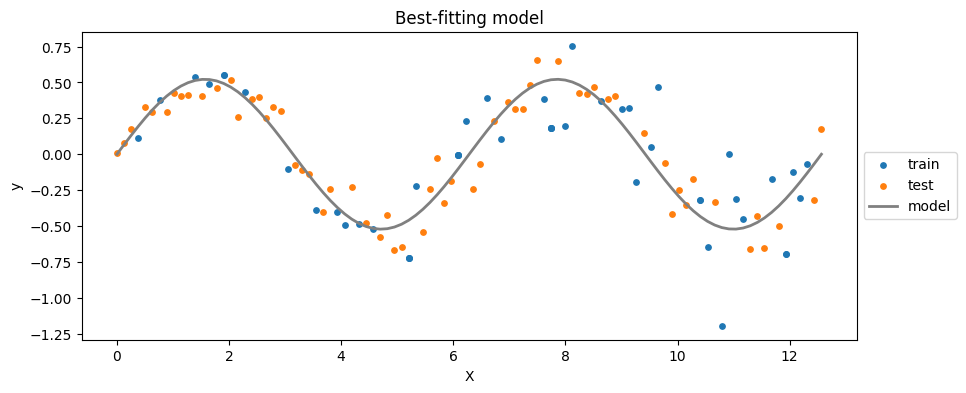

S_train: 2.84 | S_test: 0.93


In [18]:
'''Re-running the same fit as above on the new, randomized split.'''
from lmfit import Model

def model_func(x, beta_1):
    y = beta_1*np.sin(x)
    return y

model = Model(model_func)

result = model.fit(y_train, x=X_train, beta_1=0)

beta_1_hat = result.params['beta_1'].value

yhat_train_ = model_func(X_train_, beta_1_hat)
yhat_test_  = model_func(X_test_,  beta_1_hat)

xx = np.linspace(0 ,np.max(X), 100)

plt.figure(figsize=(10, 4))
plt.scatter(X_train_, y_train_, label='train', c='C0', s=15)
plt.scatter(X_test_,  y_test_,  label='test',  c='C1', s=15)
plt.plot(xx, model_func(xx, beta_1_hat), label='model', c='grey', lw=2)
#
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best-fitting model')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
plt.show()

S_train = np.sum( (yhat_train_ - y_train_)**2 )
S_test  = np.sum( (yhat_test_ - y_test_)**2 )
print("S_train: %.2f | S_test: %.2f" % (S_train, S_test))

# Non-linear least squares: Levemberg-Marquardt algorithm

We saw **linear** problems, i.e. when the model is **linear in the parameters**, e.g.:

$$ y = \beta_2 x + \beta_1 ~~~~~or~~~~~ y = \beta_1 sin(x) $$

What about the **non-linear** problems, i.e. when the model is **<u>not</u> linear in the parameters**, e.g.:

$$ y = \beta_1e^{\beta_2 x} ~~~~~or~~~~~ y = sin(\beta_1 x) ~~~~?$$

In general, LS not solvable algebraically $\rightarrow$ Need to <u>converge to the solution</u>!

## Brute-force approach (spoiler: doesn't work!)

> <u>Objective:</u> The taks is $-$ as usual $-$ to find the parameter set $\hat{\pmb{\beta}}$ that **minimizes the sum of squares** $S(\pmb{\beta})$.

So, let's say that we have a model of the type:

$$ y = \beta_1e^{\beta_2 x} $$

and we want to find $\hat{\pmb{\beta}} = (\hat{\beta_1}, \hat{\beta_2})$ that minimizes $S(\beta_1, \beta_2)$.

- - -

Let's **assume** we could potentially explore _all possible_ parameter combinations.

For each given $(\bar{\beta}_1, \bar{\beta_2})$ set, we:
- Create a the corresponding model: $\bar{y}_{pred} = \bar{\beta}_1e^{\bar{\beta}_2 x} $
- Calculate $S(\bar{\beta}_1, \bar{\beta}_2) = \sum_i^{n}(\bar{y}_{i, pred} - y_{i, obs})^2$

... and repeat _ad infinitum_.

$\rightarrow$ Then, we could hypothetically map the _whole_ $S(\beta_1, \beta_2)$ space:

<table><tr>
    <td width=600>
        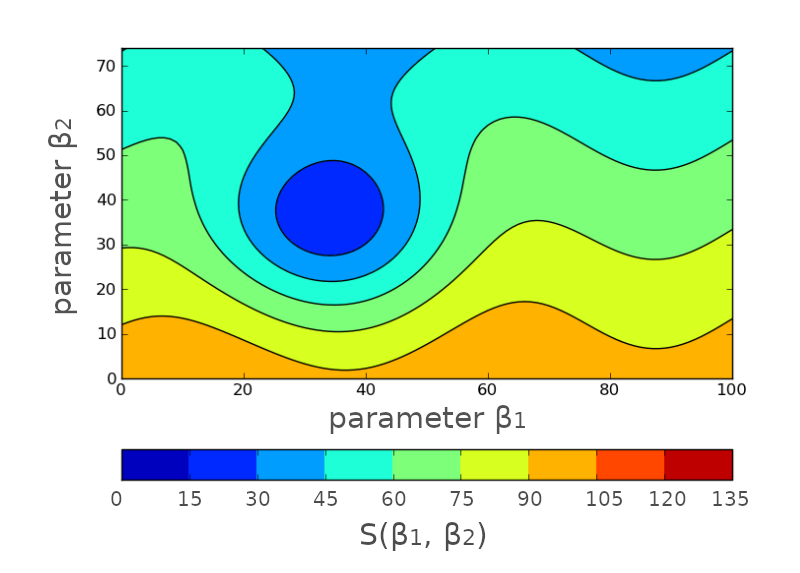
    </td>
</tr></table>

> Except that this <u>will take forever</u>!

## Iterative approach (now we are talking!)

Instead, we may want to **converge** to the best solution $\hat{\pmb{\beta}} = (\hat{\beta_1}, \hat{\beta_2})$.<br>
(_possibly in a fast way_)

> We will accept a compromise: **approximate solution**.

1. We start from a **blank state**:

<table><tr>
    <td width=600>
        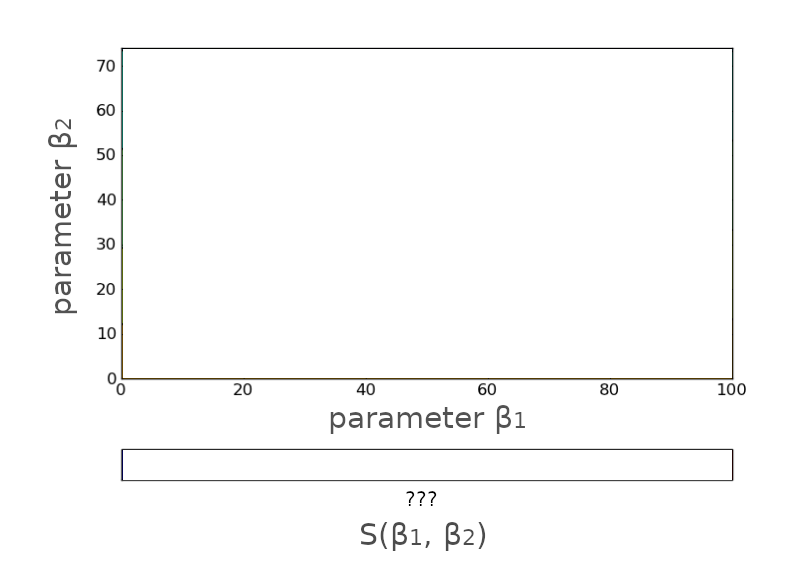
    </td>
</tr></table>

2. Or, better, from an **initial guess** $(\beta^A_1, \beta^A_2)$:<br>
(_We look at the function, we had an enlightment, we used chat codes, etc._)

<table><tr>
    <td width=600>
        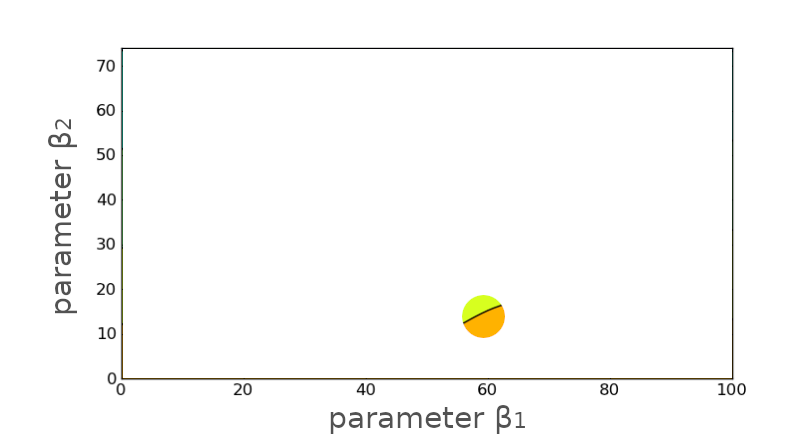
    </td>
</tr></table>

_NOTE: Here we conveniently show the neighborhood around the point we pick._

**Q:** Where to take the <u>next guess</u>? 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
<b><summary>[Spoiler] (click here to expand)</summary></b>
    
What about looking at the <b>gradient</b> (i.e., <b>derivative</b>) around that point $\rightarrow$ it points towards where the $S(\beta_1, \beta_2)$ is decreasing.
    
<table><tr>
    <td width=600>
        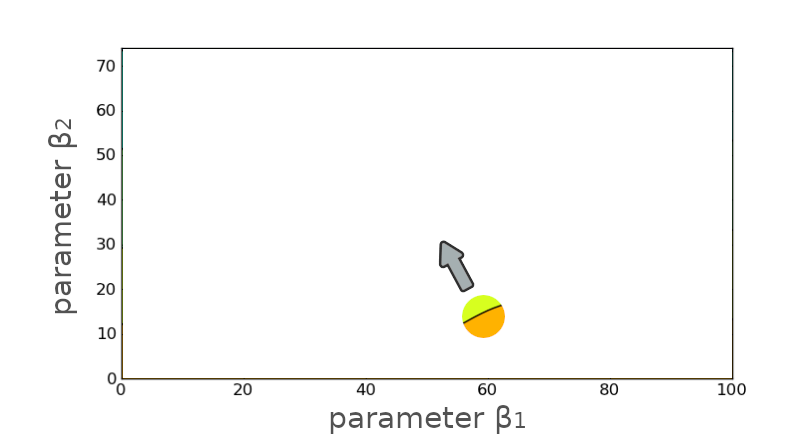
    </td>
</tr></table>

Let's follow the white rabbit and see where it leads us ...
    
</details>
</div>

3. We take the **next guess**  $(\beta^B_1, \beta^B_2)$ _somewhere along the gradient_:

<table><tr>
    <td width=600>
        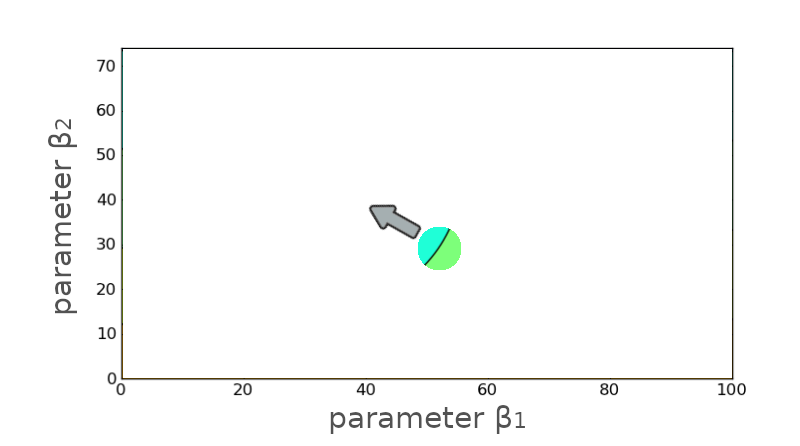
    </td>
</tr></table>

> Not bad! It lead us to a lower $S(\beta_1, \beta_2)$.  Let's try again ...

4. We take **another guess** _somewhere along the gradient_:

<table><tr>
    <td width=600>
        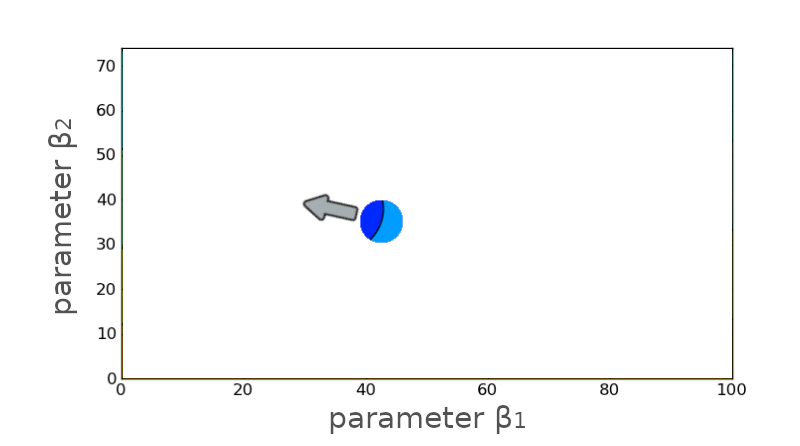
    </td>
</tr></table>


5. And again, and again .. **until we are happy** (_define happy_)

<table><tr>
    <td width=600>
        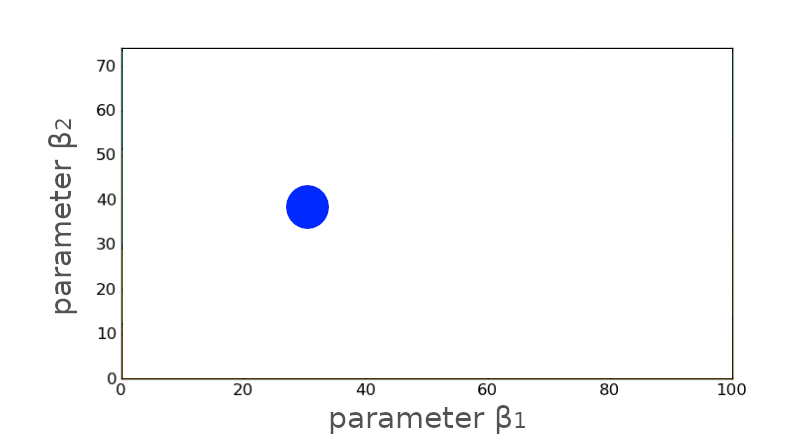
    </td>
</tr></table>

## Enough with the crayons - now, math!

_NOTE: The theory in this section is taken from this [wikipedia article on Levemberg-Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm)_

- - -

Let's call: $\hat{y}_i := f(x_i, \pmb{\beta})$ $\leftarrow$ model value for $x_i$

- The initial guess for the best-fit parameters is $\pmb{\bar{\beta}}$.

- The next guess is: $\pmb{\bar{\beta}} \rightarrow \pmb{\bar{\beta}} + \pmb{\delta}$, where $\pmb{\delta}$ is the small amount we move.

<u>**Objective:**</u> Update $\pmb{\bar{\beta}}$ until we minimized $S(\pmb{\beta})$

We can use the Taylor expansion to approximate $f(x_i, \pmb{\bar{\beta}})$ around $\pmb{\bar{\beta}}$:

$$ f(x_i, \pmb{\bar{\beta}} + \pmb{\delta}) \approx f(x_i, \pmb{\bar{\beta}}) + {\partial f(x_i, \pmb{\beta}) \over \partial\pmb{\beta}} \pmb{\delta} $$

<u>IMPORTANT:</u> Notice that **the derivative is on the parameters** ($\pmb{\beta}$), <u>not</u> the data ($x_i$)! $\rightarrow$ We want to explore the _neighborhood_ of $\pmb{\bar{\beta}}$!

We can define $\pmb{J_i} := {\partial f(x_i, \pmb{\beta}) \over \partial\pmb{\beta}} $, so:

$$
\begin{equation}
 f(x_i, \pmb{\bar{\beta}} + \pmb{\delta}) \approx f(x_i, \pmb{\bar{\beta}}) + \pmb{J_i}\pmb{\delta}  \tag{Eq. 2}
\end{equation}
$$

<u>**Algorithm:**</u>

We now need to define how much to move, to find the next gues $\rightarrow$ $\pmb{\delta} = ?$

We will find it by solving the usual problem $\rightarrow$ **minimize the sum of squares**.

If the next guess $\pmb{\bar{\beta}} + \pmb{\delta}$ corresponds to a true minimum, then $S(\pmb{\bar{\beta}} + \pmb{\delta})$ must have derivative = 0 (w/r to vector $\pmb{\delta}$):

$$ {\partial S(\pmb{\bar{\beta}} + \pmb{\delta}) \over \partial\pmb{\delta}} = 0 $$

> _Meaning: moving away from $\pmb{\bar{\beta}} + \pmb{\delta}$ causes a worse result._

Let's solve it, starting from the approximation of _Equation 2_:

$
\begin{align}
 S(\pmb{\bar{\beta}} + \pmb{\delta}) = & \sum_{i}^n [y_i - f(x_i, \pmb{\bar{\beta}} + \pmb{\delta})]^2\\
 \approx & \sum_{i}^n [y_i - f(x_i, \pmb{\bar{\beta}}) - \pmb{J_i}\pmb{\delta}]^2\\
\end{align}
$

Which $-$ in vector notation $-$ becomes:

$
\begin{align}
 S(\pmb{\bar{\beta}} + \pmb{\delta}) \approx & ~||\pmb{y} - \pmb{f(\bar{\beta})} - \pmb{J}\pmb{\delta}||^2\\
 = & ~[\pmb{y} - \pmb{f(\bar{\beta})} - \pmb{J}\pmb{\delta}]^T[\pmb{y} - \pmb{f(\bar{\beta})} - \pmb{J}\pmb{\delta}]\\
 = & ~[\pmb{y} - \pmb{f(\bar{\beta})}]^T[\pmb{y} - \pmb{f(\bar{\beta})}] - [\pmb{y} - \pmb{f(\bar{\beta})}]^T\pmb{J}\pmb{\delta} - (\pmb{J}\pmb{\delta})^T[\pmb{y} - \pmb{f(\bar{\beta})}] + \pmb{\delta}^T\pmb{J}^T\pmb{J}\pmb{\delta}\\
 = & ~[\pmb{y} - \pmb{f(\bar{\beta})}]^T[\pmb{y} - \pmb{f(\bar{\beta})}] - 2[\pmb{y} - \pmb{f(\bar{\beta})}]^T\pmb{J}\pmb{\delta} + \pmb{\delta}^T\pmb{J}^T\pmb{J}\pmb{\delta}\\
\end{align}
$

Now we take the derivative w/r to vector $\pmb{\delta}$ ([_this tables will help to follow the calculations_](https://en.wikipedia.org/wiki/Matrix_calculus)):

$
\begin{align}
0 = & ~{\partial S(\pmb{\bar{\beta}} + \pmb{\delta}) \over \partial\pmb{\delta}}\\
= &~ - 2[\pmb{y} - \pmb{J}^T\pmb{f(\bar{\beta})}] + 2\pmb{J}^T\pmb{J}\pmb{\delta}\\
\end{align}
$

.. and finally:

$$
\begin{equation}
 \big(\pmb{J}^T\pmb{J}\big)\pmb{\delta} = \pmb{J}^T[\pmb{y} - \pmb{f(\bar{\beta})}] \tag{Eq. 3}
\end{equation}
$$

$\rightarrow$ set of $p$ linear equations ($p$ = number of parameters) that **can be solved for** $\pmb{\delta}$ !

> To get to a better minimum, we can just **repeat the procedure** by replacing the starting point: $\pmb{\bar{\beta}^{\prime}} = \pmb{\bar{\beta}} + \pmb{\delta}$, move to $\pmb{\bar{\beta}^{\prime}} + \pmb{\delta}^{\prime}$, etc. <br>
> ... until we are happy.

## Actual Levemberg & Marquardt algorithms

- Equation 3 is known as **Gauss-Newton** method (1700-1800 _ca._)

- The **Levemberg** modification (1944) is:

$$
\begin{equation}
 \big(\pmb{J}^T\pmb{J} + \lambda \pmb{I}\big)\pmb{\delta} = \pmb{J}^T[\pmb{y} - \pmb{f(\bar{\beta})}] \tag{Eq. 4}
\end{equation}
$$

$\lambda$ $\rightarrow$ damping factor

> Helps for **faster convergence** and **larger accuracy** in finding the minimum

Adjusted at each iteration:
- if $S(\pmb{\beta})$ decreases rapidly $\rightarrow$ $\lambda$ is decreased (_deceleration_)
- if $S(\pmb{\beta})$ doesn't decrease enough $\rightarrow$ $\lambda$ is increased (_push_)

## Further reads

- **Marquardt** contribution $\rightarrow$ [wikipedia article on Levemberg-Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm)
- **Stopping** criteria $\rightarrow$ [wikipedia article on Levemberg-Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm)
- **Shortcomings** of L-M $\rightarrow$ [this blog](https://python4mpia.github.io/fitting_data/least-squares-fitting.html)

# Chi-square (χ2) fitting

> Basically, it's **least squares for when data have errors on y**

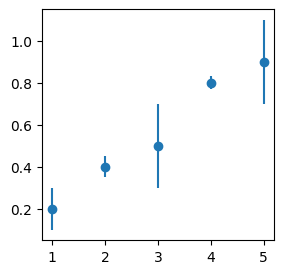

In [19]:
X = [1, 2, 3, 4, 5]
y = [0.2, 0.4, 0.5, 0.8, 0.9]
y_err= [0.1, 0.05, 0.2, 0.03, 0.2]

from matplotlib import pyplot as plt
plt.figure(figsize=(3,3))
plt.errorbar(X, y, yerr=y_err, marker="o", ls="none")
plt.show()

Instead of minimizing the sum of squares $S(\pmb{\beta})$, we minimize the **weighted average of the sum of squares** $\chi^2$:

$$
\chi^2 = \sum_i {(y_i - \hat{y_i})^2 \over \sigma_i^2}
$$

... where the weigths are the **measurement uncertainties** $\sigma_i$.

## Further reads

- Why do we use the "**reduced**" $\chi^2$ to compare model results (i.e., $\chi_{\nu}^2$)? $\rightarrow$ [Andrae et al. 2010](https://arxiv.org/pdf/1012.3754.pdf)


# Stochastic Gradient Descent - teaser

> **Gradient descent** is just one of the alternatives to L-M to **minimize $S(\pmb{\beta})$**

The update of the parameters goes as:

$$
\begin{equation}
 \pmb{\beta}^\prime \rightarrow \pmb{\beta} - \eta \nabla S(\pmb{\beta}) \tag{Eq. 5}
\end{equation}
$$

where $\nabla$ is the gradient of $S(\pmb{\beta})$.

> Meaning: **descend** along the **gradient** by a multiplicative factor $\eta$

For comparison $\rightarrow$ In Levemberg's algorithm (_Equation 4_), the factor $\lambda$ was additive.

- - -

The gradient becomes **stochastic** when the update of Equation 5 is done **sample by sample**:

<div>
   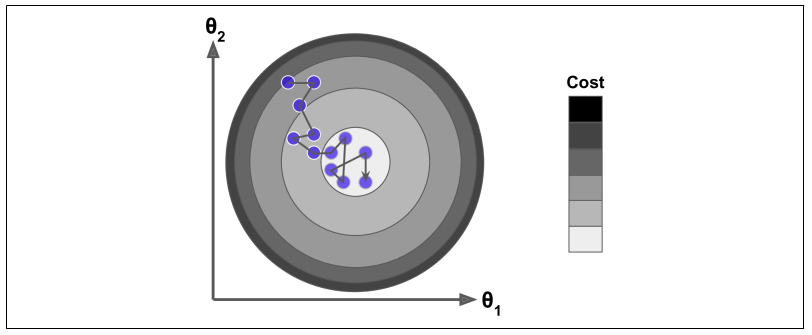
</div>

<table><tr>
    <td width=500>
        <center>
            <br>
            Figure 1. Stochastic Gradient Descent in action.<br>
            (From Figure 4-9 in Aurelien Gerone's book "<i>Hands-On Machine Learning</i>")
        </center>
    </td>
</tr></table>

$\rightarrow$ _More on Gradient Descent in the_ `DL_Intro` _notebook!_

<hr style='height:1px'>

**IMPORTANT**: Do NOT forget to write your group name in the cell below, and rename this file to \<group\>\_HW\<N\>\_2024.ipynb, where "\<group\>" is your group name and \<N\> is the Homework number.

_It's enough that 1 student of the group submits the solutions for the whole group._

You can leave the above code or $-$ _better!_ $-$ remove it.  But, in any case, <u>make sure</u> that the notebook gives the results you expected when it's run from top to bottom (you might have saved variables in blocks executed before and then deleted!).  We will not debug it for you!

**Group name**: _ _ _ _ _ _

<hr style='height:1px'>

# HomeWork 01

<font size=1>
    Nikolaos Vasilas & Elias Kyritsis, 2024. All rights reserved.
</font>    

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Curve Fitting**

In general, in science (physics, chemistry, and other fields that include experiments), we must fit a 'complex' curve to our data. To make it all more unfair, usually the data come with uncertainties.
    
In the file ```HW01_data_with_errors.csv```, you will find a dataset that includes uncertainties in the y-axis. In order to fit a curve, you can use the same library as in the lecture, ```lmfit```. Please find the documentation for that matter at the following links: 
1. [Modeling Data and Curve Fitting](https://lmfit.github.io/lmfit-py/model.html)
2. [Getting started with Non-Linear Least-Squares Fitting](https://cars9.uchicago.edu/software/python/lmfit_MinimizerResult/intro.html)

**Objective**: Fit a model to the data provided in the file ```HW01_data_with_errors.csv``` while accounting for the uncertainties. We want to explore how these _data_ uncertainties reflect into the uncertainty of the fitted _parameters_, i.e., on the uncertainty of the _model_.

**Tasks**
- **Ex 1.1**: Plot the data and their corresponding uncertainties.

<div style="margin-left: 28px;">
  $\rightarrow$ Based on the visual inspection of the data, define the functional form of a model that could plausibly fit this dataset.<br> 
  &emsp;&emsp;&emsp;&emsp;&emsp;(<i>Play a little by plotting some functions before fitting; it helps!</i>)<br>
  $\rightarrow$ Define functions that are composed by a summation of polynomials (of some order) and several sines.
</div>
    
- **Ex 1.2**: Once you defined the curves you want to fit (remember: you want to fit the polynomial + sines composite function), use `lmfit` to fit them to the data **taking into account the uncertainties**.

>_<u>WARNING:</u> You will have to figure out how to pass the **uncertainties** and **initial guesses** to `lmfit`!<br>
> &emsp;&emsp;&emsp;&emsp;&emsp;&ensp; Do not just blindly copy-paste the code from the class, but explore the `lmfit` documentation!_<br>
> &emsp;&emsp;&emsp;&emsp;&emsp;&ensp; Read the documentation very carefully!

<div style="margin-left: 28px;">
As you <i>may</i> see, you may not find the best-fit model with your first initial guess.

$\rightarrow$ Try different initial guesses for your parameter values and re-fit until you think you have an acceptable fit.
</div>

- **[Bonus] Ex 1.3**: Write in Markdown an idea about how you could automate the initial guessing process.
<br>

- **Ex 1.4**: Retrieve:
    - the best-fit parameters
    - the parameter uncertainties
    - the $\chi^{2}$ value
    - Compare the different models
    
> _All of these are trivial to retrieve if you read the `lmfit` documentation! (except for the comparison)_
<br>

- **Ex 1.5**: Plot the data again (_with their error bars!_), and this time overplot your best-fit model (_the curve, not the predictions!_). 
<br><br>

- **Ex 1.6**: Based on your best-fit parameters and their uncertainties, display the uncertainty around the best-fit model.

<div style="margin-left: 28px;">

There are numerous ways to do that; you will try these three: 

A. **The handmade way**: _You can do this by plotting a set of $-$ say $-$ 1000 curves, where each curve represents a model whose parameter values are randomly sampled within the best-fit parameter uncertainties._

> _To do that, you have to sample from a multivariate normal distribution whose [multi-dimensional] mean is the best-fit parameter values and whose covariance matrix is the parameter covariance matrix that `lmfit` can return to you (check the documentation!)._
>
> Use `np.random.multivariate_normal` to sample from the multivariate normal distribution.<br>
  (_The documentation can be found [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html)_)<br>

B. **The `not the best way', way**: Calculate the standard deviation around the model, and find the upper and lower bounds. 

C. **The quick way**: <span style="font-size: 15px; font-weight: bold; color: purple;">READ THE DOCUMENTATION</span> (_there is a dedicated `lmfit` methodology for this_) <br>

All of these must be in three separate plots and one common plot. By using the common plot, argue which **way** is better and why. 
</div>

- **Ex 1.7**:
There are two methods to fit a curve to data with uncertainties. Go back to the documentation and try to fit what you consider your best model with the method of:
    - the residuals and ```lmfit.minimize```, and
    - with ```model.fit```. 
<br><br>

- **[Bonus] Ex 1.8**:
  Do all of the above but now try to find the best combination of a polynomial component plus a component of sines. Does it make sense and align with your intuition? For the last step, use the **way** you think is the best and explain why.
    
**Hints**:

- Your plots should look like _something_ like this (these are different data):
    
<table><tr>
    <td width=600>
        <img src=attachment:HW1_image.png>
    </td>
</tr></table>

&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; where the red curves represent the 1000 realizations of the model around its best-fit parameters (_plotted with some transparency_).

- _Did we mention checking the `lmfit` documentation?_
- _We are serious. Do it._

- - -
    
PS: **If you are interested**, read the documentation and the tutorial from here [UltraNest](https://johannesbuchner.github.io/UltraNest/index.html). You might find it interesting and get some ideas!
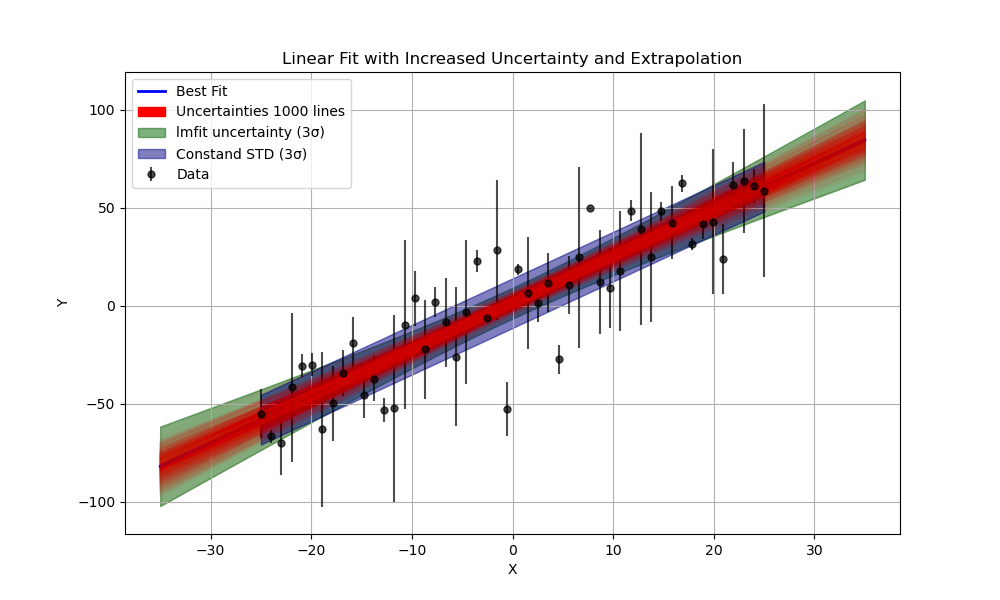

In [33]:
# In case you don't have lmfit installed:
#!conda install -c conda-forge lmfit
# or:
!pip install lmfit


x=240.32361461718037
[[Model]]
    Model(model_func1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 20
    # variables        = 10
    chi-square         = 240.323615
    reduced chi-square = 24.0323615
    Akaike info crit   = 69.7250827
    Bayesian info crit = 79.6824055
    R-squared          = 0.97475903
[[Variables]]
    a:  0.06608143 +/- 1.01967115 (1543.05%) (init = 1)
    b: -1.36727543 +/- 22.4301620 (1640.50%) (init = 1)
    c:  8.66885533 +/- 155.604304 (1794.98%) (init = 1)
    d: -7.76758811 +/- 230.778783 (2971.05%) (init = 1)
    e: -66.7098833 +/- 876.615786 (1314.07%) (init = 1)
    f:  21763531.5 +/- 4.4855e+11 (2061028.15%) (init = 1)
    g: -497152.334 +/- 1.4617e+10 (2940172.37%) (init = 1)
    h: -10.4355530 +/- 194.942446 (1868.06%) (init = 1)
    i:  448.208276 +/- 7052.12399 (1573.40%) (init = 1)
    j: -21266786.7 +/- 4.3589e+11 (2049616.92%) (init = 1)
[[Correlations]] (unreported correlations are <

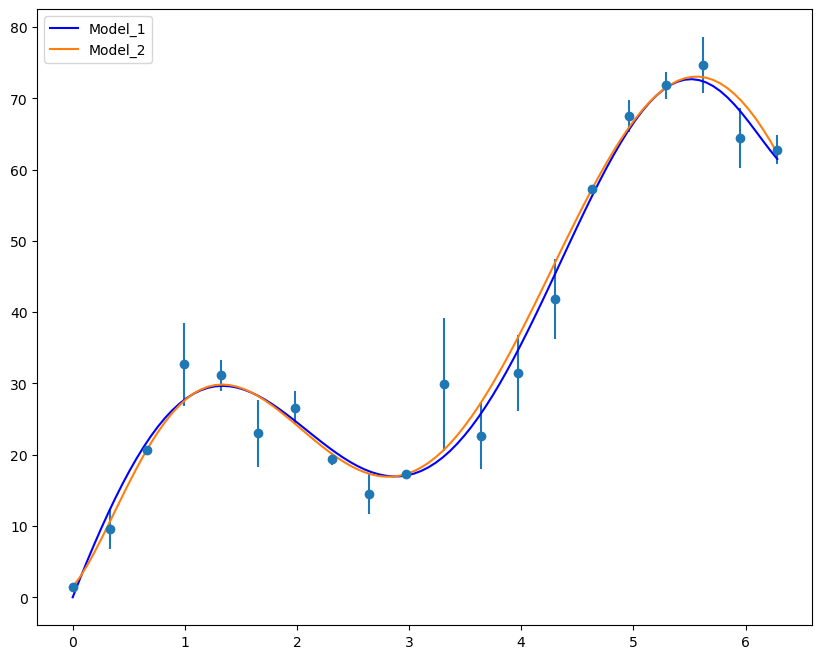

In [227]:
import numpy as np
from lmfit import Model
from lmfit import Parameters
data=np.genfromtxt("python_datafiles/HW01_data_with_errors.csv", skip_header=1,delimiter=',')
x=data[:,0]
y=data[:,1]
yerr=data[:,2]
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plt.errorbar(x, y, yerr=yerr, marker="o", ls="none")


def model_func1(x, a,b,c,d,e,f,g,h,i,j):
    y = a*x**7+b*x**6+c*x**5+d*x**4+e*x**3+h*x**2+i*x+f*np.sin(x)+g*np.sin(x)+j*np.sin(x)
    return y

model1 = Model(model_func1)
result1 = model1.fit(y,x=x,a=1,b=1,c=1,d=1,e=1,f=1,g=1,h=1,i=1,j=1)

aa = result1.params['a'].value
bb = result1.params['b'].value
cc = result1.params['c'].value
dd = result1.params['d'].value
ee = result1.params['e'].value
ff = result1.params['f'].value
gg = result1.params['g'].value
hh = result1.params['h'].value
ii = result1.params['i'].value
jj = result1.params['j'].value
xx=np.linspace(0,np.max(x),100)
plt.plot(xx,model_func1(xx,aa,bb,cc,dd,ee,ff,gg,hh,ii,jj),c='blue',label='Model_1')
xvalue = result1.chisqr
print(f'x={xvalue}')
print(result1.fit_report())



def model_func2(x,h,a,b,c,d,e,f,g):
    y= h*x**6+a*x**5+b*x**4+c*x**3+d*x**2+e*x+f+g*(np.sin(x))
    return y

model2 = Model(model_func2)
result2 = model2.fit(y, x=x,weights=1/yerr, h=1,a=2, b=1,c=1,d=1,e=1,f=1,g=1)
ahat = result2.params['a'].value
bhat = result2.params['b'].value
chat = result2.params['c'].value
dhat = result2.params['d'].value
ehat = result2.params['e'].value
fhat = result2.params['f'].value
ghat = result2.params['g'].value
hhat = result2.params['h'].value

xx=np.linspace(0,np.max(x),100)
plt.plot(xx, model_func2(xx, hhat,ahat,bhat,chat,dhat,ehat,fhat,ghat),label='Model_2')
xvalue = result2.chisqr
print(f'x={xvalue}')
print(result2.fit_report())
plt.legend(loc='upper left')


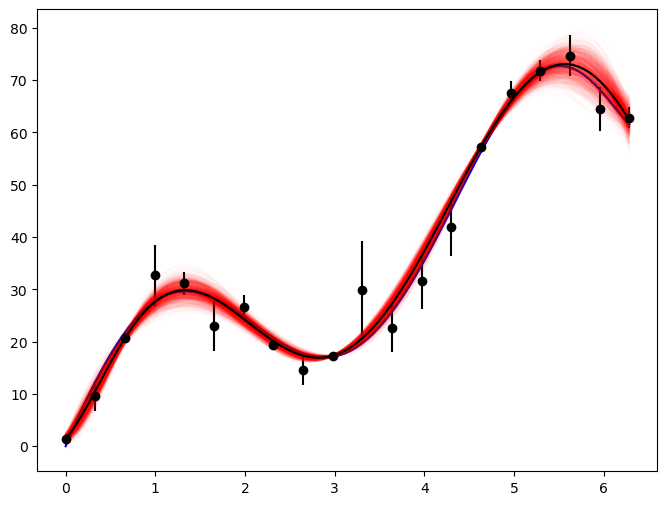

In [207]:
#THE HAND MADE WAY

data=np.genfromtxt("python_datafiles/HW01_data_with_errors.csv", skip_header=1,delimiter=',')
x=data[:,0]
y=data[:,1]
yerr=data[:,2]
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.errorbar(x, y, yerr=yerr, marker="o", ls="none",c='black')

def model_func1(x, a,b,c,d,e,f,g,h,i,j):
    y = a*x**7+b*x**6+c*x**5+d*x**4+e*x**3+h*x**2+i*x+f*np.sin(x)+g*np.sin(x)+j*np.sin(x)
    return y

model1 = Model(model_func1)
result1 = model1.fit(y,x=x,a=1,b=1,c=1,d=1,e=1,f=1,g=1,h=1,i=1,j=1)

aa = result1.params['a'].value
bb = result1.params['b'].value
cc = result1.params['c'].value
dd = result1.params['d'].value
ee = result1.params['e'].value
ff = result1.params['f'].value
gg = result1.params['g'].value
hh = result1.params['h'].value
ii = result1.params['i'].value
jj = result1.params['j'].value
xx=np.linspace(0,np.max(x),100)
plt.plot(xx,model_func1(xx,aa,bb,cc,dd,ee,ff,gg,hh,ii,jj),c='blue')



def model_func2(x,h,a,b,c,d,e,f,g):
    y= h*x**6+a*x**5+b*x**4+c*x**3+d*x**2+e*x+f+g*(np.sin(x))
    return y

model2 = Model(model_func2)
result2 = model2.fit(y, x=x,weights=1/yerr, h=1,a=2, b=1,c=1,d=1,e=1,f=1,g=1)
ahat = result2.params['a'].value
bhat = result2.params['b'].value
chat = result2.params['c'].value
dhat = result2.params['d'].value
ehat = result2.params['e'].value
fhat = result2.params['f'].value
ghat = result2.params['g'].value
hhat = result2.params['h'].value

params=np.array(result2.params)
cov=result2.covar
samples=np.random.multivariate_normal(params, cov, size=1000, check_valid='warn', tol=1e-8)

for i in range(1000):
    plt.plot(xx, model_func2(xx, samples[i,0],samples[i,1],samples[i,2],samples[i,3],samples[i,4],samples[i,5],samples[i,6],samples[i,7]),c='red', alpha=0.01)

xx=np.linspace(0,np.max(x),100)
plt.plot(xx, model_func2(xx, hhat,ahat,bhat,chat,dhat,ehat,fhat,ghat),c='black')

[1.91425039 4.48333812 1.84794859 4.34801569 5.651951   4.76161951
 3.32932606 2.59077109 1.74376707 0.30999299 2.20061668 3.79041464
 4.00298295 2.67322768 0.997487   2.68172474 4.89892745 7.4911418
 8.74573931 7.31464344]


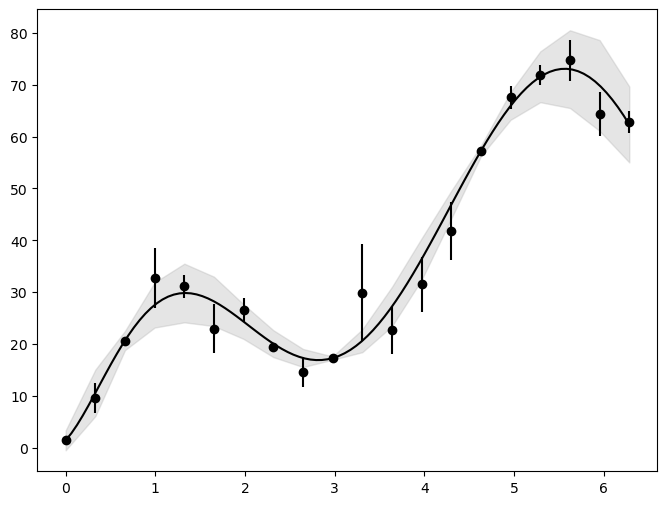

In [215]:
#the 'not the best way'

data=np.genfromtxt("python_datafiles/HW01_data_with_errors.csv", skip_header=1,delimiter=',')
x=data[:,0]
y=data[:,1]
yerr=data[:,2]
plt.figure(figsize=(8,6))
plt.errorbar(x, y, yerr=yerr, marker="o", ls="none",c='black')
def model_func2(x,h,a,b,c,d,e,f,g):
    y= h*x**6+a*x**5+b*x**4+c*x**3+d*x**2+e*x+f+g*(np.sin(x))
    return y

model2 = Model(model_func2)
result2 = model2.fit(y, x=x,weights=1/yerr, h=1,a=2, b=1,c=1,d=1,e=1,f=1,g=1)
ahat = result2.params['a'].value
bhat = result2.params['b'].value
chat = result2.params['c'].value
dhat = result2.params['d'].value
ehat = result2.params['e'].value
fhat = result2.params['f'].value
ghat = result2.params['g'].value
hhat = result2.params['h'].value

xx=np.linspace(0,np.max(x),100)


dely = result2.eval_uncertainty(sigma=3)
plt.fill_between(x, result2.best_fit-dely, result2.best_fit+dely, color="#ABABAB",
                 label=r'3-$\sigma$ uncertainty band',alpha=0.3)
print(dely)
plt.plot(xx, model_func2(xx, hhat,ahat,bhat,chat,dhat,ehat,fhat,ghat),c='black')

Standard Deviation of Residuals: 3.59


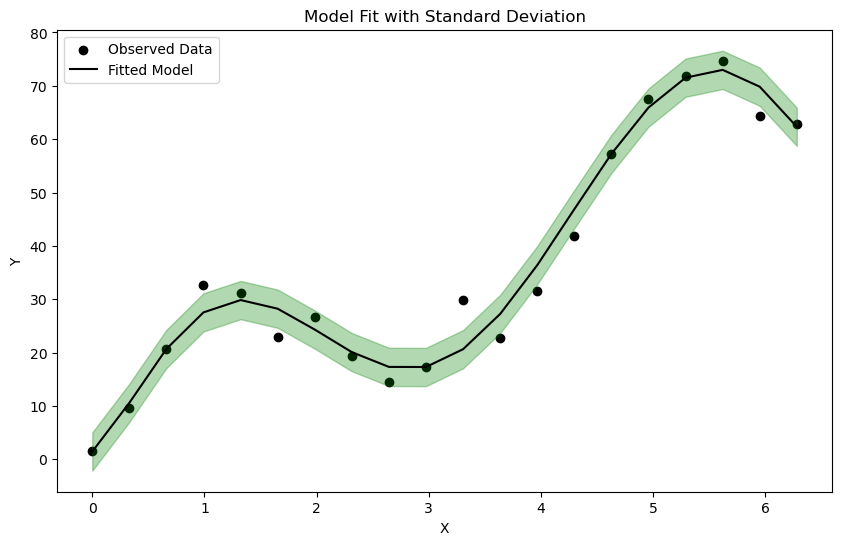

In [217]:
#the quick way

y_predicted = result2.best_fit
residuals = y - y_predicted

# Step 5: Calculate the standard deviation of the residuals
std_dev = np.std(residuals)

# Print results
print(f'Standard Deviation of Residuals: {std_dev:.2f}')
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Observed Data', color='black', alpha=1)
plt.plot(x, y_predicted, label='Fitted Model', color='black')
plt.fill_between(x, y_predicted - std_dev, y_predicted + std_dev, color='green', alpha=0.3)
plt.title('Model Fit with Standard Deviation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

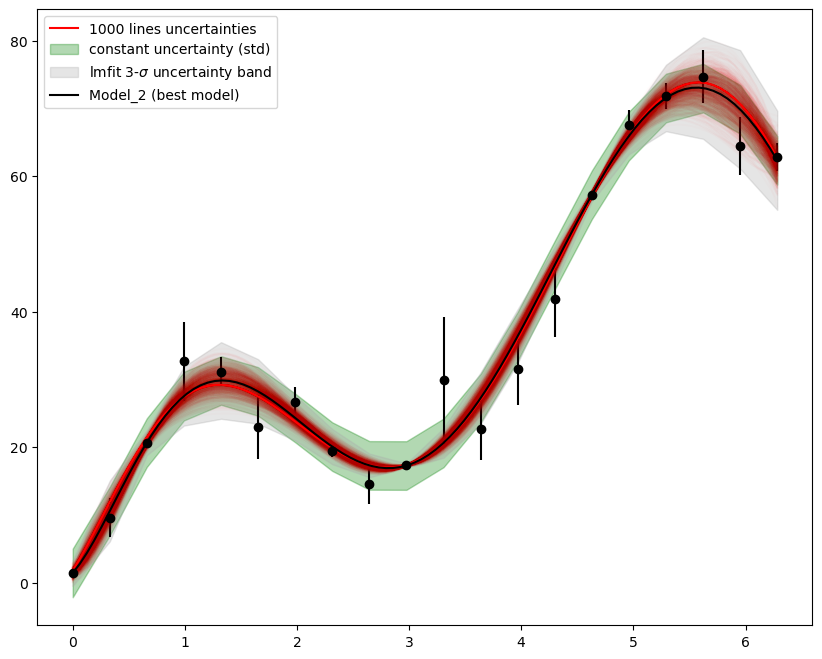

In [246]:
import numpy as np
from lmfit import Model
from lmfit import Parameters
data=np.genfromtxt("python_datafiles/HW01_data_with_errors.csv", skip_header=1,delimiter=',')
x=data[:,0]
y=data[:,1]
yerr=data[:,2]
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plt.errorbar(x, y, yerr=yerr, marker="o", ls="none",c='black')

def model_func2(x,h,a,b,c,d,e,f,g):
    y= h*x**6+a*x**5+b*x**4+c*x**3+d*x**2+e*x+f+g*(np.sin(x))
    return y

model2 = Model(model_func2)
result2 = model2.fit(y, x=x,weights=1/yerr, h=1,a=2, b=1,c=1,d=1,e=1,f=1,g=1)
ahat = result2.params['a'].value
bhat = result2.params['b'].value
chat = result2.params['c'].value
dhat = result2.params['d'].value
ehat = result2.params['e'].value
fhat = result2.params['f'].value
ghat = result2.params['g'].value
hhat = result2.params['h'].value

xx=np.linspace(0,np.max(x),100)
params=np.array(result2.params)
cov=result2.covar
samples=np.random.multivariate_normal(params, cov, size=1000, check_valid='warn', tol=1e-8)

for i in range(1000):
    if i==0:
        plt.plot(xx, model_func2(xx, samples[i,0],samples[i,1],samples[i,2],samples[i,3],samples[i,4],samples[i,5],samples[i,6],samples[i,7]),c='red', alpha=1,label='1000 lines uncertainties')
    else:
        plt.plot(xx, model_func2(xx, samples[i,0],samples[i,1],samples[i,2],samples[i,3],samples[i,4],samples[i,5],samples[i,6],samples[i,7]),c='red', alpha=0.01)

plt.fill_between(x, y_predicted - std_dev, y_predicted + std_dev, color='green', alpha=0.3,label='constant uncertainty (std)')

dely = result2.eval_uncertainty(sigma=3)
plt.fill_between(x, result2.best_fit-dely, result2.best_fit+dely, color="#ABABAB",
                 label=r'lmfit 3-$\sigma$ uncertainty band',alpha=0.3)
plt.plot(xx, model_func2(xx, hhat,ahat,bhat,chat,dhat,ehat,fhat,ghat),c='black',label='Model_2 (best model)')
plt.legend()

[  0.09573552  -2.2649162   18.99680033 -62.33268696  40.69607211
  95.09465924   1.45049612 -76.16218985]


AttributeError: 'MinimizerResult' object has no attribute 'params'

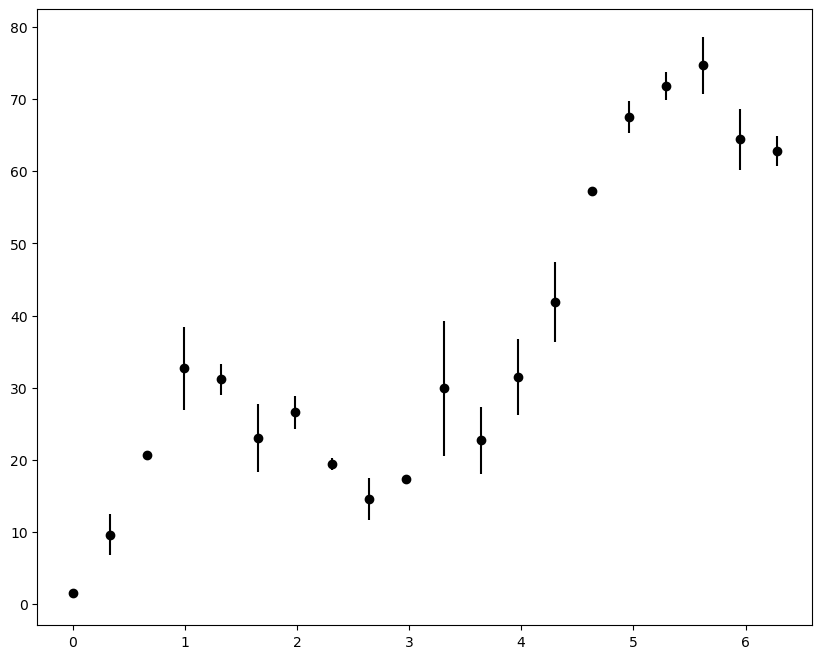

In [242]:
#1.7
import numpy as np
from lmfit import Model
from lmfit import Parameters
import lmfit
data=np.genfromtxt("python_datafiles/HW01_data_with_errors.csv", skip_header=1,delimiter=',')
x=data[:,0]
y=data[:,1]
yerr=data[:,2]
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plt.errorbar(x, y, yerr=yerr, marker="o", ls="none",c='black')

def model_func2(x,h,a,b,c,d,e,f,g):
    y= h*x**6+a*x**5+b*x**4+c*x**3+d*x**2+e*x+f+g*(np.sin(x))
    return y

model2 = Model(model_func2)
result2 = model2.fit(y, x=x,weights=1/yerr, h=1,a=2, b=1,c=1,d=1,e=1,f=1,g=1)
ahat = result2.params['a'].value
bhat = result2.params['b'].value
chat = result2.params['c'].value
dhat = result2.params['d'].value
ehat = result2.params['e'].value
fhat = result2.params['f'].value
ghat = result2.params['g'].value
hhat = result2.params['h'].value

xx=np.linspace(0,np.max(x),100)
params=np.array(result2.params)
print(params)

def residuals(params, x, y, y_err):
    return (y - model(params, x)) / yerr

result3 = lmfit.minimize(residuals, params, args=(x, y, yerr))

# Print the fitted values
lmfit.report_fit(result3)

# Plotting (optional, requires matplotlib)
import matplotlib.pyplot as plt
plt.errorbar(x, y, yerr=yerr, fmt='o', label='Data')
plt.plot(xx, model(result3.params, xx), label='Best Fit')
plt.legend()
plt.show()


In [23]:
#EOF

In [24]:
#EOF